In [32]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
# The Rastrigin function is commonly used for testing optimization algorithms.
# It is a multimodal function with many local minima and a single global minimum.
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))


In [36]:
class GeneticAlgorithm:
    def __init__(self, objective_function, dimension, pop_size, mutation_rate, generations):
        self.objective_function = objective_function
        self.dimension = dimension
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.population = np.random.uniform(-5.12, 5.12, (pop_size, dimension))  # Initial population
        self.best_fitness = []

    def mutate(self, parent):
        mutation_strength = 0.1  # Adjust as necessary
        return parent + mutation_strength * np.random.randn(self.dimension)

    def crossover(self, parent1, parent2):
        # Single-point crossover
        crossover_point = np.random.randint(1, self.dimension-1)
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        return child

    def evolve(self):
        best_fitness = []

        for gen in range(self.generations):
            next_population = []  # Initialize next population

            # Evaluate fitness for current population
            fitness = np.apply_along_axis(self.objective_function, 1, self.population)
            sorted_indices = np.argsort(fitness)

            # Select best individual from current population
            best_individual = self.population[sorted_indices[0]]
            best_fitness.append(fitness[sorted_indices[0]])

            # Create next generation
            while len(next_population) < self.pop_size:
                parents = self.population[sorted_indices[:2]]  # Top 2 parents for crossover
                child = self.crossover(parents[0], parents[1])
                child = self.mutate(child)
                next_population.append(child)  # Add the child to next population

            self.population = np.array(next_population)

            print(f"Generation {gen+1}, Best Fitness: {best_fitness[-1]}")

        return {'best_fitness': best_fitness}  # Ensure this returns a dictionary with best_fitness


In [38]:
class EvolutionStrategy:
    def __init__(self, objective_function, dimension, pop_size, mutation_rate, generations):
        self.objective_function = objective_function
        self.dimension = dimension
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.population = np.random.uniform(-5.12, 5.12, (pop_size, dimension))  # Initial population
        self.best_fitness = []

    def mutate(self, parent):
        mutation_strength = 0.1  # You can adjust this
        return parent + mutation_strength * np.random.randn(self.dimension)

    def evolve(self):
        best_fitness = []

        for gen in range(self.generations):
            next_population = []  # Initialize next population

            # Evaluate fitness for current population
            fitness = np.apply_along_axis(self.objective_function, 1, self.population)
            sorted_indices = np.argsort(fitness)

            # Select best individual from current population
            best_individual = self.population[sorted_indices[0]]
            best_fitness.append(fitness[sorted_indices[0]])

            # Create next generation
            while len(next_population) < self.pop_size:
                parent = self.population[np.random.randint(0, self.pop_size)]  # Random parent
                child = self.mutate(parent)
                next_population.append(child)  # Add child to next population

            self.population = np.array(next_population)

            print(f"Generation {gen+1}, Best Fitness: {best_fitness[-1]}")

        return {'best_fitness': best_fitness}  # Ensure it returns the correct dictionary


In [40]:
# Define hyperparameters for both algorithms
dimension = 10  # Number of dimensions in the optimization problem
pop_size = 50   # Population size
mutation_rate = 0.1  # Mutation rate
generations = 100  # Number of generations


Running Genetic Algorithm...
Generation 1, Best Fitness: 118.6861634565334
Generation 2, Best Fitness: 87.5016942566821
Generation 3, Best Fitness: 92.96061478409764
Generation 4, Best Fitness: 83.8194406861995
Generation 5, Best Fitness: 77.87668028287092
Generation 6, Best Fitness: 68.92656155444047
Generation 7, Best Fitness: 69.10772219577517
Generation 8, Best Fitness: 70.75034727333238
Generation 9, Best Fitness: 67.10007827092352
Generation 10, Best Fitness: 67.34404093425805
Generation 11, Best Fitness: 68.35773139389818
Generation 12, Best Fitness: 70.54358600909379
Generation 13, Best Fitness: 70.39394533580524
Generation 14, Best Fitness: 72.49477566771357
Generation 15, Best Fitness: 69.91586068148682
Generation 16, Best Fitness: 71.59284529800021
Generation 17, Best Fitness: 73.16439089531386
Generation 18, Best Fitness: 76.5169093932611
Generation 19, Best Fitness: 71.63587467320741
Generation 20, Best Fitness: 72.54115134152522
Generation 21, Best Fitness: 70.02884913053

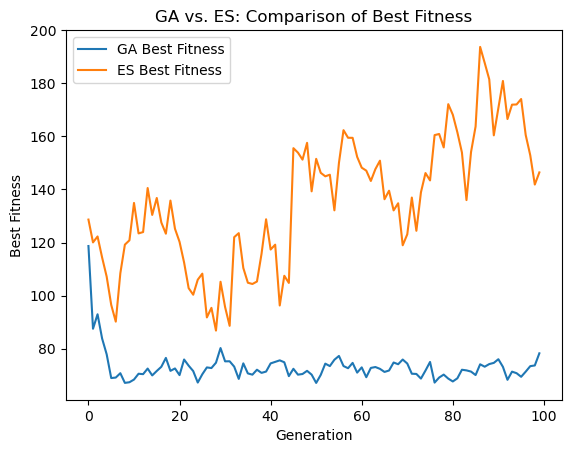

In [42]:
def compare_algorithms():
    # Run the Genetic Algorithm
    print("Running Genetic Algorithm...")
    ga = GeneticAlgorithm(
        objective_function=rastrigin,
        dimension=dimension,
        pop_size=pop_size,
        mutation_rate=mutation_rate,
        generations=generations
    )
    ga_results = ga.evolve()  # This will return a dictionary with 'best_fitness'

    # Run the Evolution Strategy
    print("Running Evolution Strategy...")
    es = EvolutionStrategy(
        objective_function=rastrigin,
        dimension=dimension,
        pop_size=pop_size,
        mutation_rate=mutation_rate,
        generations=generations
    )
    es_results = es.evolve()  # This will also return a dictionary with 'best_fitness'

    # Plot the results to compare performance
    plt.plot(range(generations), ga_results['best_fitness'], label='GA Best Fitness')
    plt.plot(range(generations), es_results['best_fitness'], label='ES Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.legend()
    plt.title('GA vs. ES: Comparison of Best Fitness')
    plt.show()

# Run the comparison function
compare_algorithms()
